# Data Wrangling

## Latihan Data Wrangling

### Persiapan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Gathering Data

- Memuat tabel customers

In [6]:
customers_df = pd.read_csv("data/customers.csv")
customers_df.head()

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,fulan 1,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia
1,2,fulan 2,Prefer not to say,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia
2,3,fulan 3,Prefer not to say,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia
3,4,fulan 4,Prefer not to say,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia
4,5,fulan 5,Prefer not to say,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia


- Load tabel orders


In [7]:
orders_df = pd.read_csv("data/orders.csv")
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


- Memuat tabel product

In [8]:
product_df = pd.read_csv("data/products.csv")
product_df.head()

,product_id,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"


- Load tabel sales

In [9]:
sales_df = pd.read_csv("data/sales.csv")
sales_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212.0
1,1,1,481,118,1,118.0
2,2,1,2,96,3,288.0
3,3,1,1002,106,2,212.0
4,4,1,691,113,3,339.0


### Assessing Data

#### Menilai Data `customers_df`

In [10]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB


In [11]:
customers_df.isna().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

In [12]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  6


In [13]:
customers_df.describe()

,customer_id,age,zip_code
count,1007.000000,1007.000000,1007.000000
mean,501.726912,50.929494,5012.538232
std,288.673238,30.516299,2885.836112
min,1.000000,20.000000,2.000000
25%,252.500000,34.000000,2403.500000
50%,502.000000,50.000000,5087.000000
75%,751.500000,65.000000,7493.500000
max,1000.000000,700.000000,9998.000000


#### Menilai Data `orders_df`

In [14]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [15]:
orders_df.nunique()

order_id         1000
customer_id       617
payment           995
order_date        291
delivery_date     305
dtype: int64

In [16]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,payment
count,1000.000000,1000.000000,1000.000000
mean,500.500000,506.640000,33972.936000
std,288.819436,277.115502,14451.609047
min,1.000000,1.000000,10043.000000
25%,250.750000,275.250000,21329.250000
50%,500.500000,515.000000,33697.500000
75%,750.250000,737.250000,46249.000000
max,1000.000000,1000.000000,59910.000000


#### Menilai Data `product_df`

In [17]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    1266 non-null   int64 
 1   product_type  1266 non-null   object
 2   product_name  1266 non-null   object
 3   size          1266 non-null   object
 4   colour        1266 non-null   object
 5   price         1266 non-null   int64 
 6   quantity      1266 non-null   int64 
 7   description   1266 non-null   object
dtypes: int64(3), object(5)
memory usage: 79.3+ KB


In [18]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

product_df.describe()

Jumlah duplikasi:  6


,product_id,price,quantity
count,1266.000000,1266.000000,1266.000000
mean,627.926540,105.812006,60.138231
std,363.971586,9.715611,11.682791
min,0.000000,90.000000,40.000000
25%,313.250000,95.250000,50.000000
50%,626.500000,109.000000,60.000000
75%,942.750000,114.000000,70.000000
max,1259.000000,119.000000,80.000000


#### Menilai Data `sales_df`

In [19]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sales_id        5000 non-null   int64  
 1   order_id        5000 non-null   int64  
 2   product_id      5000 non-null   int64  
 3   price_per_unit  5000 non-null   int64  
 4   quantity        5000 non-null   int64  
 5   total_price     4981 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [20]:
sales_df.isna().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

In [21]:
print("Jumlah duplikasi: ", sales_df.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
print("Jumlah duplikasi: ", sales_df.duplicated().sum())
sales_df.describe()

Jumlah duplikasi:  0


,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4981.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.307368
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.352449
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


### Cleaning Data

#### Membersihkan Data `customers_df`

- Menghilangkan duplicate data

In [23]:
customers_df.duplicated().sum()

6

In [24]:
customers_df.drop_duplicates(inplace=True)

In [25]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


- Menangani missing value

In [26]:
customers_df.isna().sum()

customer_id       0
customer_name     0
gender           18
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

In [27]:
customers_df[customers_df.gender.isna()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
38,39,fulan 39,NaN,80,7440 Cameron Estate DrSuite 628,4622,North Victoriachester,Northern Territory,Australia
167,168,fulan 168,NaN,27,2781 Berge MallSuite 452,1975,North Leoburgh,Western Australia,Australia
322,322,fulan 322,NaN,30,593 Becker CircleApt. 333,1640,Jacobiview,Western Australia,Australia
393,393,fulan 393,NaN,34,5158 Levi HillSuite 531,1474,Johnsburgh,Queensland,Australia
442,442,fulan 442,NaN,26,5157 Feil RoadApt. 633,7249,Port Chloe,New South Wales,Australia
722,720,fulan 720,NaN,40,31 Jordan ParadeApt. 400,1380,West Henry,South Australia,Australia
745,743,fulan 743,NaN,57,09 Christopher StreetSuite 967,6226,Lake Lukemouth,Western Australia,Australia
773,771,fulan 771,NaN,74,7367 Wright JunctionApt. 773,8882,Kuhntown,Victoria,Australia
798,795,fulan 795,NaN,49,487 Summer MewsApt. 874,1712,East Hayden,Australian Capital Territory,Australia
801,798,fulan 798,NaN,56,27 Aiden KnollApt. 875,6531,Port Sam,Australian Capital Territory,Australia


In [28]:
customers_df.gender.value_counts()

gender
Prefer not to say    725
Male                 143
Female               115
Name: count, dtype: int64

In [29]:
customers_df.fillna(value="Prefer not to say", inplace=True)

In [30]:
customers_df.isna().sum()

customer_id      0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
dtype: int64

- Menangani inaccurate value

In [31]:
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,50.953047,5000.693307
std,289.013599,30.578437,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,700.000000,9998.000000


In [32]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
967,961,fulan 961,Prefer not to say,700,29 Farrell ParadeSuite 818,6528,New Joseph,South Australia,Australia


In [33]:
customers_df.age.replace(customers_df.age.max(), 70, inplace=True)

In [34]:
customers_df[customers_df.age == customers_df.age.max()]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
215,216,fulan 216,Prefer not to say,500,038 Haley MewsApt. 810,3991,Bayertown,Northern Territory,Australia


In [35]:
customers_df.age.replace(customers_df.age.max(), 50, inplace=True)

In [36]:
customers_df.describe()

,customer_id,age,zip_code
count,1001.000000,1001.000000,1001.000000
mean,500.942058,49.874126,5000.693307
std,289.013599,17.644663,2886.084454
min,1.000000,20.000000,2.000000
25%,251.000000,34.000000,2398.000000
50%,501.000000,50.000000,5079.000000
75%,751.000000,65.000000,7454.000000
max,1000.000000,80.000000,9998.000000


#### Membersihkan Data `orders_df`

In [37]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


- Memperbaiki tipe data

In [38]:
datetime_columns = ["order_date", "delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [39]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   int64         
 1   customer_id    1000 non-null   int64         
 2   payment        1000 non-null   int64         
 3   order_date     1000 non-null   datetime64[ns]
 4   delivery_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 39.2 KB


In [40]:
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-08-30,2021-09-24
1,2,473,50490,2021-02-03,2021-02-13
2,3,774,46763,2021-10-08,2021-11-03
3,4,433,39782,2021-05-06,2021-05-19
4,5,441,14719,2021-03-23,2021-03-24


#### Membersihkan Data `product_df`

- Duplicate data

In [41]:
product_df[product_df.duplicated()]

,product_id,product_type,product_name,size,colour,price,quantity,description
112,54,Shirt,Dress,XL,green,119,52,"A green coloured, XL sized, Dress Shirt"
232,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
365,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt"
435,377,Shirt,Henley,M,indigo,92,70,"A indigo coloured, M sized, Henley Shirt"
540,483,Jacket,Puffer,L,indigo,110,61,"A indigo coloured, L sized, Puffer Jacket"
587,579,Jacket,Bomber,XL,green,90,79,"A green coloured, XL sized, Bomber Jacket"


In [42]:
product_df.drop_duplicates(inplace=True)

In [43]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


#### Membersihkan Data `sales_df`

- Missing values

In [44]:
sales_df.isna().sum()

sales_id           0
order_id           0
product_id         0
price_per_unit     0
quantity           0
total_price       19
dtype: int64

In [45]:
sales_df[sales_df.total_price.isna()]

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
9,9,2,1196,105,1,NaN
121,121,27,1027,90,3,NaN
278,278,63,360,94,2,NaN
421,421,95,1091,115,1,NaN
489,489,108,1193,105,3,NaN
539,539,117,405,119,2,NaN
636,636,134,653,93,3,NaN
687,687,145,1138,102,1,NaN
854,854,177,64,104,1,NaN
1079,1079,222,908,94,3,NaN


In [46]:
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

In [47]:
sales_df.isna().sum()

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

# Exploratory Data Analysis

### Latihan Exploratory Data Analysis

#### Explore Data `customers_df`

In [48]:
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
17,18,fulan 18,Male,79,13 Bailey ManorApt. 848,7171,Walterland,New South Wales,Australia
335,335,fulan 335,Male,76,7443 Bayer RidgeSuite 024,5888,Lake George,Australian Capital Territory,Australia
7,8,fulan 8,Prefer not to say,75,383 Muller SummitSuite 809,7681,Samside,Northern Territory,Australia
255,256,fulan 256,Prefer not to say,46,7204 Toby SummitApt. 845,9007,North Lillian,Australian Capital Territory,Australia
606,605,fulan 605,Female,25,8676 William HillApt. 725,4750,Hamiltonshire,Western Australia,Australia


In [49]:
customers_df.describe(include="all")

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country
count,1001.000000,1001,1001,1001.000000,1001,1001.000000,1001,1001,1001
unique,NaN,1000,3,NaN,1000,NaN,961,8,1
top,NaN,fulan 943,Prefer not to say,NaN,3117 Heller PlaceSuite 149,NaN,East Aidan,South Australia,Australia
freq,NaN,2,743,NaN,2,NaN,3,140,1001
mean,500.942058,NaN,NaN,49.874126,NaN,5000.693307,NaN,NaN,NaN
std,289.013599,NaN,NaN,17.644663,NaN,2886.084454,NaN,NaN,NaN
min,1.000000,NaN,NaN,20.000000,NaN,2.000000,NaN,NaN,NaN
25%,251.000000,NaN,NaN,34.000000,NaN,2398.000000,NaN,NaN,NaN
50%,501.000000,NaN,NaN,50.000000,NaN,5079.000000,NaN,NaN,NaN
75%,751.000000,NaN,NaN,65.000000,NaN,7454.000000,NaN,NaN,NaN


In [50]:
customers_df.customer_id.is_unique

False

In [51]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0          1
1          2
2          3
3          4
4          5
        ... 
1002     996
1003     997
1004     998
1005     999
1006    1000
Name: customer_id, Length: 1001, dtype: int64>

In [52]:
customers_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std", ]
})

customer_id age                          
                      nunique max min       mean        std
gender                                                     
Female                    115  79  20  49.147826  16.646607
Male                      143  80  20  51.230769  18.462635
Prefer not to say         742  80  20  49.725437  17.644283

In [53]:
customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)

city
East Sophia     3
New Ava         3
East Aidan      3
Kingmouth       2
Corkeryshire    2
               ..
Justinport      1
Kaiberg         1
Kaifort         1
Kaihaven        1
Johnsonhaven    1
Name: customer_id, Length: 961, dtype: int64

In [54]:
customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

state
South Australia                 139
Queensland                      134
New South Wales                 132
Northern Territory              125
Western Australia               124
Australian Capital Territory    121
Victoria                        121
Tasmania                        104
Name: customer_id, dtype: int64

### Explore Data `orders_df`

In [55]:
orders_df.sample(5)

,order_id,customer_id,payment,order_date,delivery_date
590,591,588,39095,2021-06-18,2021-07-06
454,455,1,24550,2021-04-04,2021-04-06
606,607,648,36692,2021-10-19,2021-11-12
806,807,636,47092,2021-02-17,2021-03-03
267,268,530,57006,2021-03-16,2021-04-10


In [56]:
delivery_time = orders_df["delivery_date"] - orders_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [57]:
orders_df.sample(5)

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
503,504,192,57782,2021-01-13,2021-02-08,26.0
317,318,433,39332,2021-01-31,2021-02-17,17.0
501,502,485,57115,2021-02-18,2021-03-07,17.0
315,316,179,59876,2021-09-12,2021-09-20,8.0
145,146,912,22750,2021-08-30,2021-09-26,27.0


In [58]:
orders_df.describe(include="all")

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
count,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12,14.078000
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00,1.000000
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00,8.000000
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00,14.000000
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00,21.000000
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00,27.000000
std,288.819436,277.115502,14451.609047,NaN,NaN,7.707225


<Axes: >

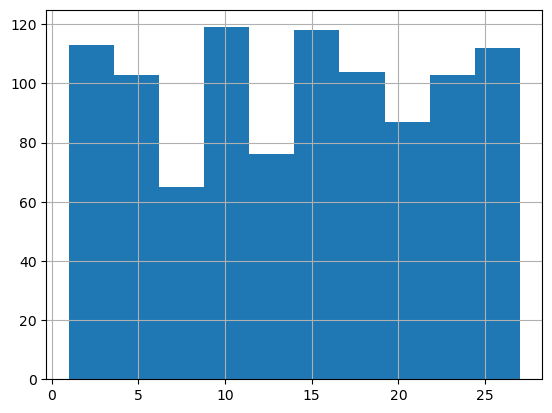

In [59]:
orders_df.delivery_time.hist()

In [60]:
customer_id_in_orders_df =  orders_df.customer_id
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
606,605,fulan 605,Female,25,8676 William HillApt. 725,4750,Hamiltonshire,Western Australia,Australia,Active
95,96,fulan 96,Prefer not to say,41,461 Nader LaneApt. 460,2012,Hudsontown,New South Wales,Australia,Active
583,582,fulan 582,Female,65,5260 Ward IslandApt. 429,429,Skyeland,South Australia,Australia,Active
347,347,fulan 347,Female,20,16 Maddison MewsSuite 093,1435,Levihaven,Victoria,Australia,Active
714,712,fulan 712,Prefer not to say,71,749 Klein SummitSuite 383,5372,Lefflermouth,Australian Capital Territory,Australia,Active


In [61]:
customers_df.groupby(by="status").customer_id.count()

status
Active        1000
Non Active       1
Name: customer_id, dtype: int64

In [62]:
customers_df[customers_df.status == "Non Active"]

,customer_id,customer_name,gender,age,home_address,zip_code,city,state,country,status
1006,1000,fulan 1000,Male,71,1671 Lauren KnollSuite 945,9012,Lake Audreyborough,Tasmania,Australia,Non Active


### Explore Data `orders_df` & `customers_df`

#### Menggabungkan data `customers_df` dan `orders_df`

In [63]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time,customer_name,gender,age,home_address,zip_code,city,state,country,status
0,1,64,30811,2021-08-30,2021-09-24,25.0,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active
1,2,473,50490,2021-02-03,2021-02-13,10.0,fulan 473,Male,61,531 Schmitt BoulevardApt. 010,1744,Annaton,South Australia,Australia,Active
2,3,774,46763,2021-10-08,2021-11-03,26.0,fulan 774,Prefer not to say,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia,Active
3,4,433,39782,2021-05-06,2021-05-19,13.0,fulan 433,Prefer not to say,46,5777 Mayer PassApt. 881,9728,West Michaelport,Tasmania,Australia,Active
4,5,441,14719,2021-03-23,2021-03-24,1.0,fulan 441,Prefer not to say,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia,Active


- Jumlah order berdasarkan kota

In [64]:
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).head(10)

city
Jordanside          6
New Ava             6
East Max            5
West Kai            5
O'keefeton          5
Port Hannahburgh    5
Lake Rose           5
Rubyfort            5
Gleasonburgh        4
Claudiaview         4
Name: order_id, dtype: int64

- Jumlah order berdasarkan state

In [65]:
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False)

state
South Australia                 148
Queensland                      139
Western Australia               130
New South Wales                 129
Victoria                        118
Australian Capital Territory    118
Tasmania                        112
Northern Territory              106
Name: order_id, dtype: int64

- Jumlah order berdasarkan gender

In [66]:
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False)

gender
Prefer not to say    725
Female               139
Male                 136
Name: order_id, dtype: int64

- Jumlah order berdasarkan kelompok usia


In [67]:
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))

In [68]:
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

age_group
Adults     681
Seniors    226
Youth       93
Name: order_id, dtype: int64

### Eksplorasi Data `product_df` 

In [69]:
product_df.sample(10)

,product_id,product_type,product_name,size,colour,price,quantity,description
1191,1185,Trousers,High-Waisted,XS,violet,98,72,"A violet coloured, XS sized, High-Waisted Trou..."
1065,1059,Trousers,Joggers,XL,orange,94,44,"A orange coloured, XL sized, Joggers Trousers"
1240,1234,Trousers,Tracksuit Bottoms,XL,orange,91,42,"A orange coloured, XL sized, Tracksuit Bottoms..."
122,121,Shirt,Denim,S,green,115,49,"A green coloured, S sized, Denim Shirt"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"
1131,1125,Trousers,Cargo Pants,XS,orange,106,43,"A orange coloured, XS sized, Cargo Pants Trousers"
500,496,Jacket,Windbreaker,S,orange,109,55,"A orange coloured, S sized, Windbreaker Jacket"
8,8,Shirt,Oxford Cloth,L,orange,114,48,"A orange coloured, L sized, Oxford Cloth Shirt"
568,563,Jacket,Bomber,L,red,90,50,"A red coloured, L sized, Bomber Jacket"
420,417,Shirt,Casual Slim Fit,M,violet,113,46,"A violet coloured, M sized, Casual Slim Fit Shirt"


In [70]:
product_df.describe(include="all")

,product_id,product_type,product_name,size,colour,price,quantity,description
count,1260.000000,1260,1260,1260,1260,1260.000000,1260.000000,1260
unique,NaN,3,35,8,7,NaN,NaN,1260
top,NaN,Shirt,Denim,XS,red,NaN,NaN,"A violet coloured, XL sized, Tracksuit Bottoms..."
freq,NaN,420,70,252,180,NaN,NaN,1
mean,629.500000,NaN,NaN,NaN,NaN,105.805556,60.150000,NaN
std,363.874979,NaN,NaN,NaN,NaN,9.704423,11.670573,NaN
min,0.000000,NaN,NaN,NaN,NaN,90.000000,40.000000,NaN
25%,314.750000,NaN,NaN,NaN,NaN,95.750000,50.000000,NaN
50%,629.500000,NaN,NaN,NaN,NaN,108.500000,60.000000,NaN
75%,944.250000,NaN,NaN,NaN,NaN,114.000000,70.000000,NaN


In [71]:
product_df.sort_values(by="price", ascending=False)

,product_id,product_type,product_name,size,colour,price,quantity,description
977,971,Trousers,Slim-Fit,S,indigo,119,41,"A indigo coloured, S sized, Slim-Fit Trousers"
976,970,Trousers,Slim-Fit,XS,indigo,119,74,"A indigo coloured, XS sized, Slim-Fit Trousers"
58,58,Shirt,Dress,L,blue,119,61,"A blue coloured, L sized, Dress Shirt"
59,59,Shirt,Dress,XL,blue,119,66,"A blue coloured, XL sized, Dress Shirt"
978,972,Trousers,Slim-Fit,M,indigo,119,67,"A indigo coloured, M sized, Slim-Fit Trousers"
...,...,...,...,...,...,...,...,...
1224,1218,Trousers,Pleated,L,indigo,90,73,"A indigo coloured, L sized, Pleated Trousers"
1225,1219,Trousers,Pleated,XL,indigo,90,45,"A indigo coloured, XL sized, Pleated Trousers"
1226,1220,Trousers,Pleated,XS,violet,90,58,"A violet coloured, XS sized, Pleated Trousers"
1227,1221,Trousers,Pleated,S,violet,90,50,"A violet coloured, S sized, Pleated Trousers"


In [72]:
product_df.groupby(by="product_type").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price":  ["min", "max"]
})

product_id quantity price     
                nunique      sum   min  max
product_type                               
Jacket              420    25387    90  119
Shirt               420    25263    92  119
Trousers            420    25139    90  119

In [73]:
product_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

product_id quantity price     
                     nunique      sum   min  max
product_name                                    
Bomber                    35     2083    90   90
Camp Collared             35     2071   112  112
Cardigan                  35     2032   118  118
Cargo Pants               35     2146   106  106
Casual Slim Fit           35     2086   113  113
Chambray                  35     2020   105  105
Chinos                    35     2101   100  100
Coach                     35     2158   115  115
Cords                     35     2260   113  113
Cropped                   35     2085    99   99
Cuban Collar              35     2017    93   93
Denim                     70     4204    92  115
Drawstring                35     2042   104  104
Dress                     35     2125   119  119
Flannel                   35     2135    96   96
Henley                    35     2051    92   92
High-Waisted              35     2198    98   98
Joggers                   35     2107    94   94
Leather                   35     2276   113  113
Linen                     35     2138   116  116
Mandarin Collar           35     2203   108  108
Oxford Cloth              35     2071   114  114
Parka                     35     2201   119  119
Peacoat                   35     2067   102  102
Pleated                   35     2030    90   90
Polo                      35     2196   117  117
Puffer                    35     1946   110  110
Pullover                  35     2184   114  114
Relaxed Leg               35     2002    95   95
Shearling                 35     2169    95   95
Slim-Fit                  35     2155   119  119
Tracksuit Bottoms         35     2038    91   91
Trench Coat               35     2132   112  112
Windbreaker               35     2085   109  109
Wool                      35     1975   111  111

### Explore Data `sales_df`

In [74]:
sales_df.sample(5)

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
3931,3931,785,1242,112,2,224
749,749,159,410,119,3,357
2600,2600,521,625,112,1,112
959,959,196,239,106,3,318
3125,3125,630,882,94,3,282


In [75]:
sales_df.describe(include="all")

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


In [76]:
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25.0
1,2,473,50490,2021-02-03,2021-02-13,10.0
2,3,774,46763,2021-10-08,2021-11-03,26.0
3,4,433,39782,2021-05-06,2021-05-19,13.0
4,5,441,14719,2021-03-23,2021-03-24,1.0


In [77]:
sales_df.groupby(by="order_id").total_price.sum()

order_id
1      1487
2      1130
3       508
4       976
5      2043
       ... 
995    1127
996    1459
997     204
998    1352
999     440
Name: total_price, Length: 993, dtype: int64

### Explore Data `sales_df` & `product_df`

#### Menggabungkan data `sales_df` dan `product_df`

In [78]:
sales_product_df = pd.merge(
    left=sales_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,price,quantity_y,description
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"


Jika diperhatikan terdapat perbedaan antara nilai **price_per_unit** dan **price**. Hal ini bisa terjadi karena adanya potongan harga, biaya operasional, atau biaya lainnya.

In [79]:
sales_product_df.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

,sales_id,quantity_x,total_price
product_type,,,
Jacket,1676,3343,357026
Shirt,1641,3259,333600
Trousers,1683,3360,341174


In [80]:
sales_product_df.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,sales_id,quantity_x,total_price
product_name,,,
Denim,273,527,52399
Casual Slim Fit,154,306,36414
Trench Coat,146,299,35581
Shearling,150,302,35334
Puffer,140,298,35164
Flannel,141,281,33158
Cropped,135,284,32660
Pleated,147,308,32340
Joggers,164,334,31062


### Eksplorasi Data `all_df`


#### Menghubungkan semua data

In [81]:
all_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors


In [82]:
all_df.groupby(by=["city", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
city        product_type                         
Abbeyshire  Jacket                 7          683
            Shirt                  7          739
            Trousers              12         1209
Abbottburgh Jacket                 3          279
            Shirt                  9          937
...                              ...          ...
Zacharybury Trousers              17         1829
Zacshire    Jacket                 2          224
            Shirt                  2          184
Zacville    Jacket                 6          645
            Shirt                  4          394

[1602 rows x 2 columns]

In [83]:
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
state                        product_type                         
Australian Capital Territory Jacket               406        43204
                             Shirt                396        40448
                             Trousers             454        46790
New South Wales              Jacket               451        47998
                             Shirt                431        43980
                             Trousers             392        39766
Northern Territory           Jacket               365        38991
                             Shirt                336        33865
                             Trousers             384        38998
Queensland                   Jacket               499        53511
                             Shirt                417        42506
                             Trousers             453        46045
South Australia              Jacket               461        49090
                             Shirt                509        52685
                             Trousers             455        46041
Tasmania                     Jacket               412        44370
                             Shirt                387        39668
                             Trousers             379        38057
Victoria                     Jacket               359        38203
                             Shirt                390        40206
                             Trousers             414        41948
Western Australia            Jacket               390        41659
                             Shirt                393        40242
                             Trousers             429        43529

In [84]:
all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
gender            product_type                         
Female            Jacket               481        50963
                  Shirt                445        45146
                  Trousers             481        49295
Male              Jacket               480        50978
                  Shirt                410        41939
                  Trousers             453        46071
Prefer not to say Jacket              2382       255085
                  Shirt               2404       246515
                  Trousers            2426       245808

In [85]:
all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

quantity_x  total_price
age_group product_type                         
Adults    Jacket              2292       245055
          Shirt               2225       227781
          Trousers            2272       231271
Seniors   Jacket               777        82959
          Shirt                733        74977
          Trousers             766        77471
Youth     Jacket               274        29012
          Shirt                301        30842
          Trousers             322        32432

In [86]:
all_df.groupby(by="state").agg({
    "order_id": "nunique",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,order_id,total_price
state,,
South Australia,144,147816
Queensland,139,142062
New South Wales,129,131744
Australian Capital Territory,118,130442
Western Australia,130,125430
Tasmania,112,122095
Victoria,115,120357
Northern Territory,106,111854


In [87]:
all_df.to_csv("all_data.csv", index=False)

# Data Visualization

## Latihan Membuat Visualisasi Data

1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
1. Produk apa yang paling banyak dan paling sedikit terjual?
1. Bagaimana demografi pelanggan yang kita miliki?
1. Kapan terakhir pelanggan melakukan transaksi?
1. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
1. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

### Membuat Visualisasi Data yang Menjawab Pertanyaan Bisnis

#### Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [88]:
all_df.sample(5)

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
1490,1490,304,104,118,3,354,Shirt,Flannel,XL,violet,...,fulan 537,Prefer not to say,45,155 Hayes AvenueApt. 699,7342,Krisland,Western Australia,Australia,Active,Adults
1757,1757,356,554,98,3,294,Jacket,Leather,XL,indigo,...,fulan 236,Prefer not to say,80,64 Phillips RunApt. 722,2752,East Sienna,New South Wales,Australia,Active,Seniors
1848,1848,373,86,118,1,118,Shirt,Flannel,S,green,...,fulan 581,Prefer not to say,40,11 Nader ParadeApt. 016,9022,Hackettland,South Australia,Australia,Active,Adults
1032,1032,212,517,102,2,204,Jacket,Windbreaker,M,indigo,...,fulan 62,Prefer not to say,32,049 Imogen StreetSuite 299,2404,New Beaumouth,Australian Capital Territory,Australia,Active,Adults
1517,1517,312,31,96,2,192,Shirt,Oxford Cloth,S,violet,...,fulan 683,Prefer not to say,45,098 Clarke ParkwayApt. 312,3661,West Finnberg,Australian Capital Territory,Australia,Active,Adults


In [89]:
orders_df.head()

,order_id,customer_id,payment,order_date,delivery_date,delivery_time
0,1,64,30811,2021-08-30,2021-09-24,25.0
1,2,473,50490,2021-02-03,2021-02-13,10.0
2,3,774,46763,2021-10-08,2021-11-03,26.0
3,4,433,39782,2021-05-06,2021-05-19,13.0
4,5,441,14719,2021-03-23,2021-03-24,1.0


In [90]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_date,order_count,revenue
0,January,109,119333
1,February,93,95080
2,March,117,131364
3,April,99,97530
4,May,84,85597


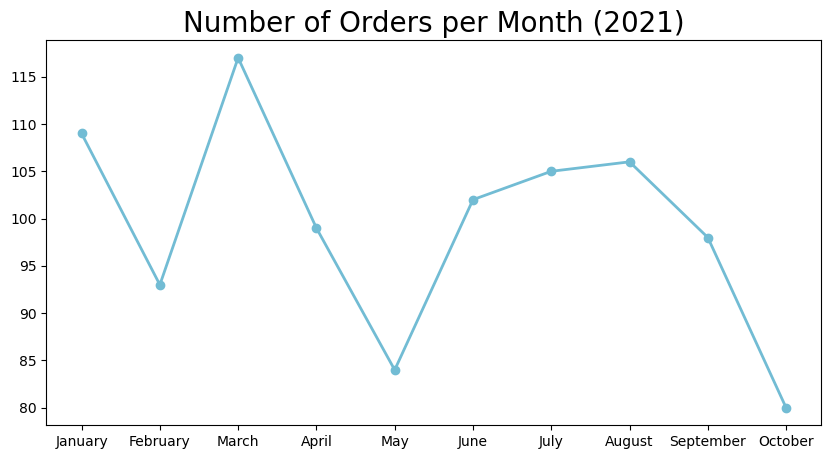

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["order_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

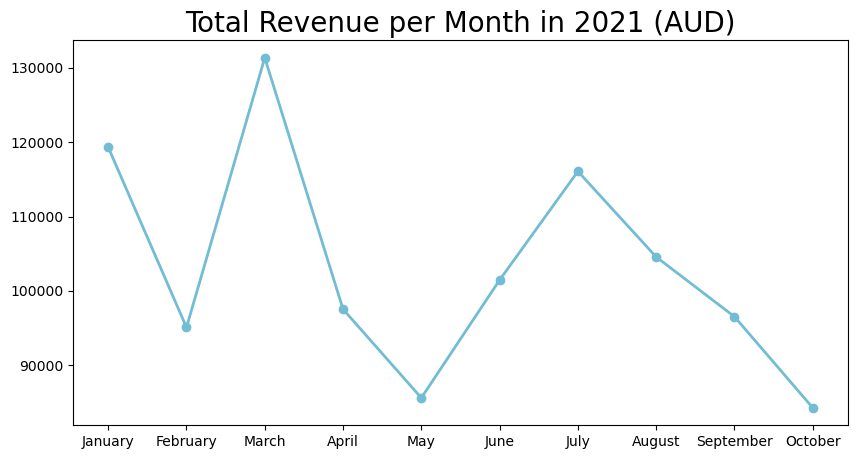

In [92]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month in 2021 (AUD)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Produk apa yang paling banyak dan paling sedikit terjual?

In [93]:
sum_order_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_name,quantity_x
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


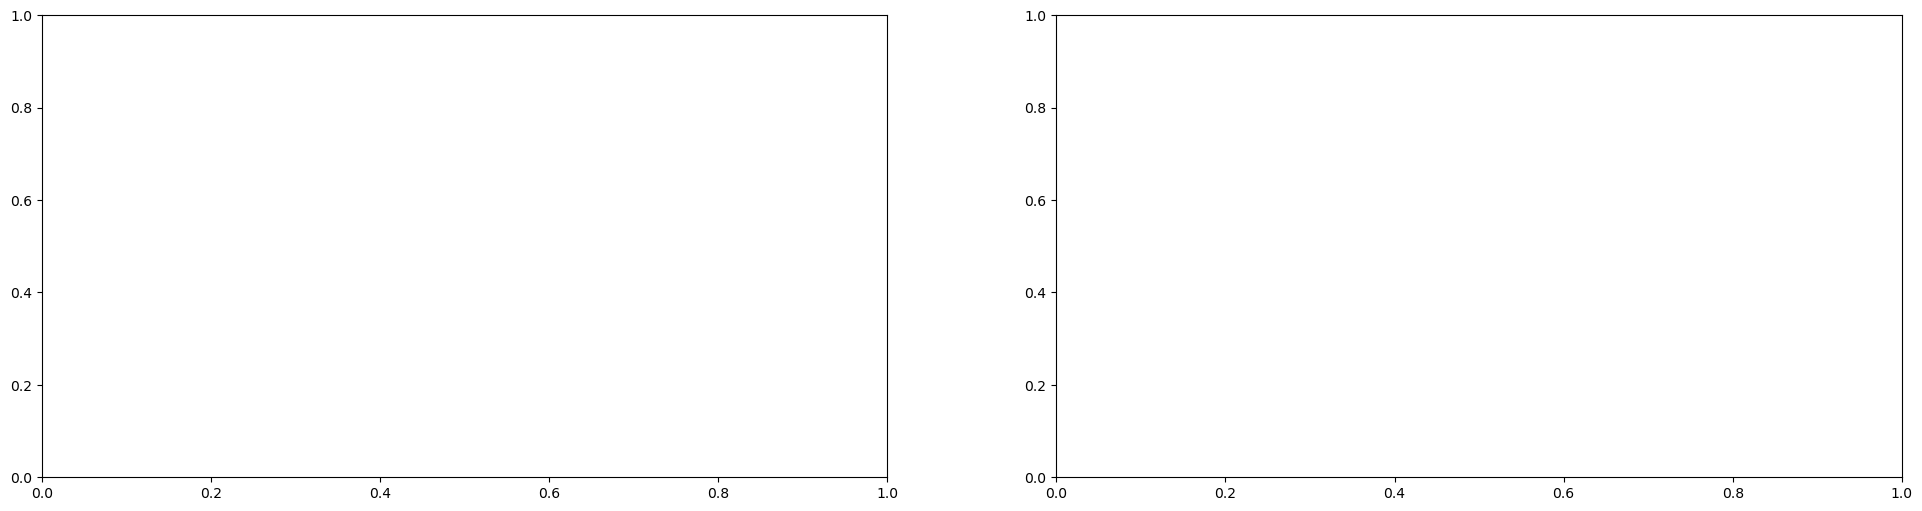

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))


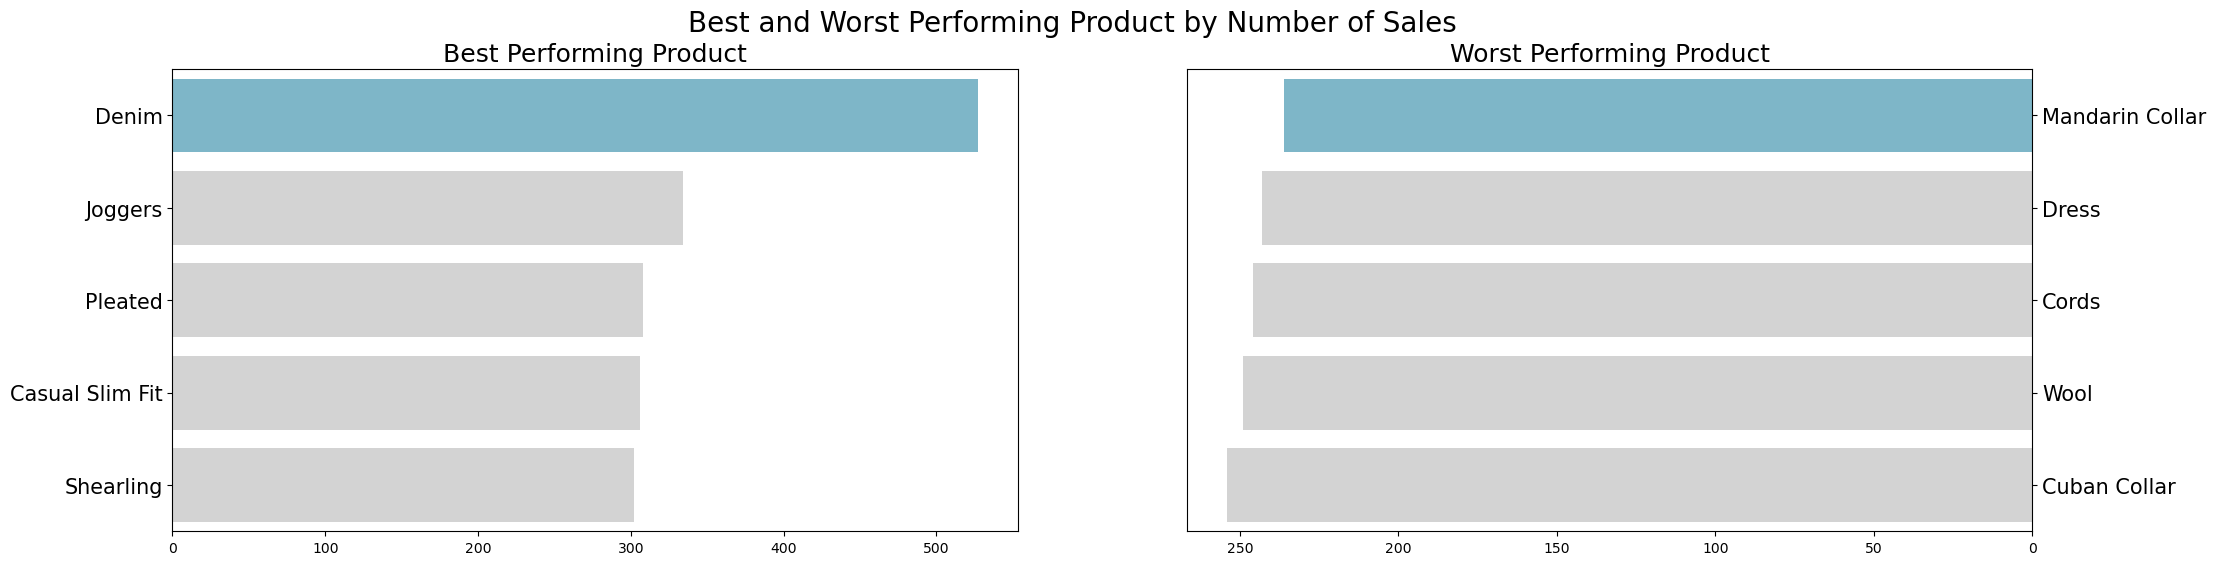

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

#### Bagaimana demografi pelanggan yang kita miliki?

- Berdasarkan gender

In [96]:
bygeder_df = all_df.groupby(by="gender").customer_id.nunique().reset_index()
bygeder_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bygeder_df

,gender,customer_count
0,Female,73
1,Male,82
2,Prefer not to say,461


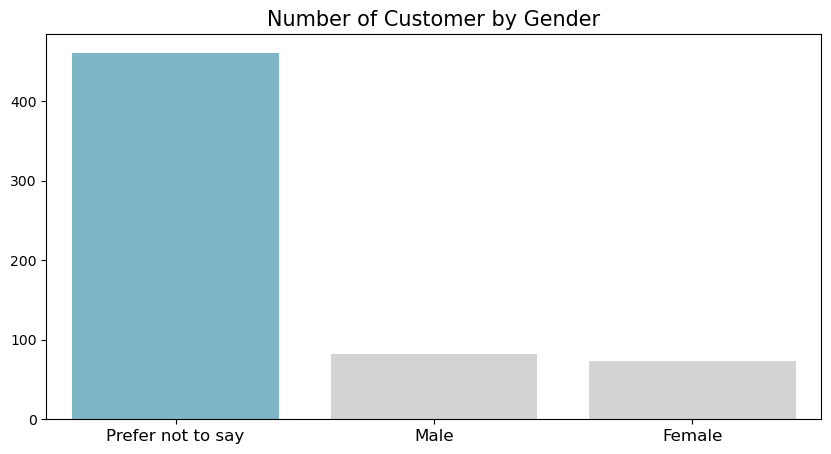

In [97]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count", 
    x="gender",
    data=bygeder_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

- Berdasarkan age


In [98]:
byage_df = all_df.groupby(by="age_group").customer_id.nunique().reset_index()
byage_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
byage_df

,age_group,customer_count
0,Adults,416
1,Seniors,145
2,Youth,55


In [99]:
byage_df['age_group'] = pd.Categorical(byage_df['age_group'], ["Youth", "Adults", "Seniors"])

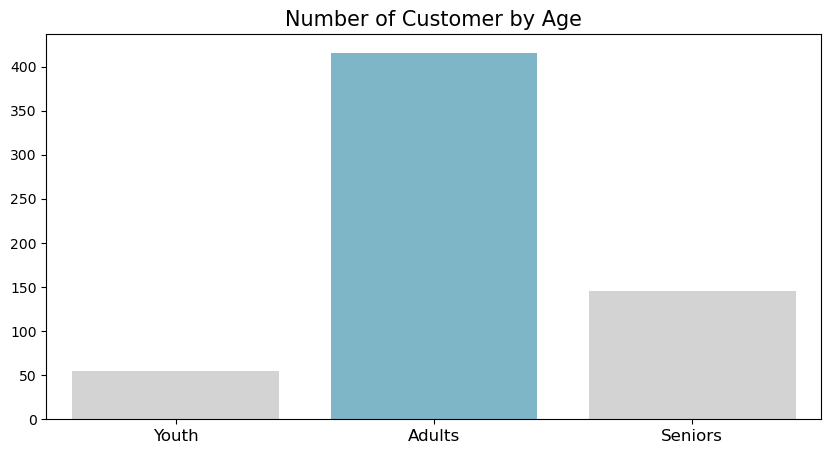

In [100]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="customer_count", 
    x="age_group",
    data=byage_df.sort_values(by="age_group", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Age", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

- Berdasarkan states


In [101]:
bystate_df = all_df.groupby(by="state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df

,state,customer_count
0,Australian Capital Territory,73
1,New South Wales,77
2,Northern Territory,75
3,Queensland,79
4,South Australia,90
5,Tasmania,67
6,Victoria,75
7,Western Australia,80


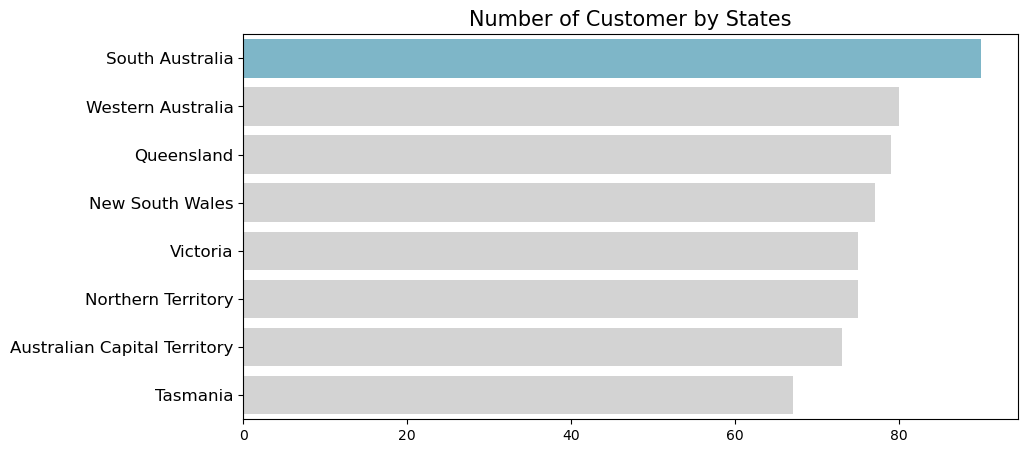

In [102]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

#### RFM Analysis

- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [104]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "total_price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,1,2021-04-04,3,1641
1,7,2021-05-21,1,1017
2,10,2021-03-09,1,270
3,11,2021-05-28,1,382
4,12,2021-06-19,1,1551


In [105]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,1,2021-04-04,3,1641,203
1,7,2021-05-21,1,1017,156
2,10,2021-03-09,1,270,229
3,11,2021-05-28,1,382,149
4,12,2021-06-19,1,1551,127


In [106]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,3,1641,203
1,7,1,1017,156
2,10,1,270,229
3,11,1,382,149
4,12,1,1551,127


In [107]:
rfm_df.describe()

,customer_id,frequency,monetary,recency
count,616.00000,616.000000,616.000000,616.000000
mean,501.75974,1.612013,1675.000000,122.469156
std,286.16075,0.853754,1069.724092,84.326017
min,1.00000,1.000000,100.000000,0.000000
25%,259.50000,1.000000,878.250000,50.750000
50%,496.50000,1.000000,1439.000000,110.500000
75%,751.00000,2.000000,2165.000000,191.000000
max,1000.00000,6.000000,7632.000000,296.000000


In [108]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
241,401,4,3093,0
426,690,3,3693,0
425,687,1,1122,0
250,415,2,2269,1
98,163,3,3494,1


In [109]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
350,571,6,6640,66
166,282,5,7632,63
346,566,5,5435,5
409,664,5,6341,20
212,348,5,5119,24


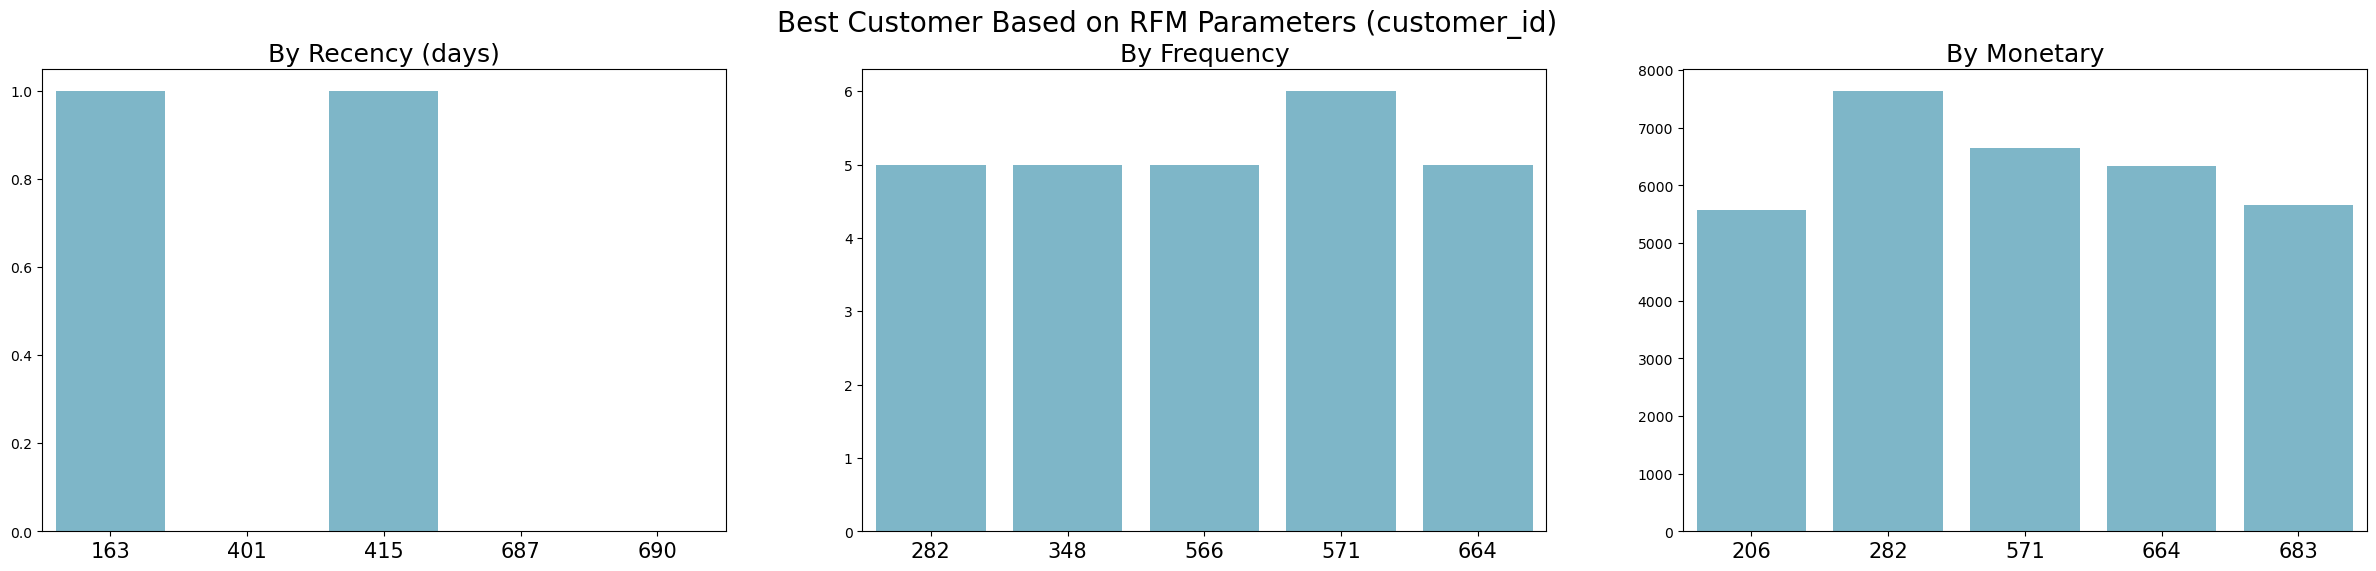

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

#### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [111]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,1,3,1641,203,133.0,560.0,351.0
1,7,1,1017,156,215.5,179.5,195.5
2,10,1,270,229,83.0,179.5,11.0
3,11,1,382,149,233.0,179.5,21.0
4,12,1,1551,127,267.5,179.5,330.0


In [112]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,1,3,1641,203,21.626016,90.909091,56.980519
1,7,1,1017,156,35.040650,29.139610,31.737013
2,10,1,270,229,13.495935,29.139610,1.785714
3,11,1,382,149,37.886179,29.139610,3.409091
4,12,1,1551,127,43.495935,29.139610,53.571429


In [113]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,1,3.06
1,7,1.58
2,10,0.56
3,11,0.79
4,12,2.26
5,13,1.14
6,15,3.84


#### Segmentasi customer berdasarkan RFM_score

In [114]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,1,3.06,Medium value customer
1,7,1.58,lost customers
2,10,0.56,lost customers
3,11,0.79,lost customers
4,12,2.26,Low value customers
5,13,1.14,lost customers
6,15,3.84,Medium value customer
7,16,2.33,Low value customers
8,18,3.30,Medium value customer
9,19,1.68,Low value customers


In [115]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,50
1,Low value customers,204
2,Medium value customer,137
3,Top customers,35
4,lost customers,190


In [116]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

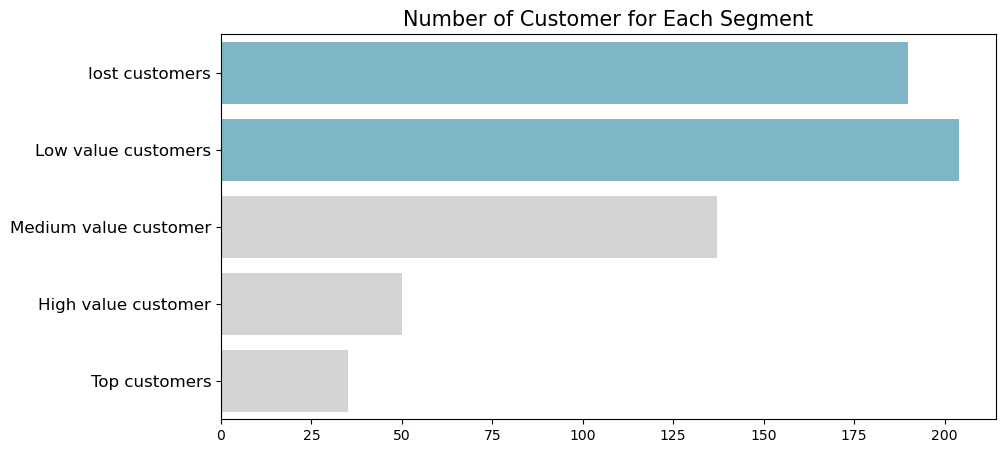

In [117]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()